In [33]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import os
import pandas as pd
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
sns.set_style('white')


import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [34]:
songs = pd.read_csv("/Users/kashishsharma/Desktop/project_ds/Swap-spotify.csv")

In [35]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 9 columns):
Unnamed: 0               1066 non-null int64
artist                   1066 non-null object
track                    1066 non-null object
peak_position            1066 non-null int64
peak_position_grouped    1066 non-null int64
weeks_in_charts          1066 non-null int64
spotify_id               1066 non-null object
explicit                 1066 non-null float64
spotify_popularity       1066 non-null int64
dtypes: float64(1), int64(5), object(3)
memory usage: 75.1+ KB


In [36]:
# from sklearn import preprocessing

# loudness = songs[['loudness']].values
# min_max_scaler = preprocessing.MinMaxScaler()
# loudness_scaled = min_max_scaler.fit_transform(loudness)
# songs['loudness'] = pd.DataFrame(loudness_scaled)

In [37]:
songs_features = songs.copy()
songs_features = songs_features.drop(['track','artist', 'spotify_id'],axis=1)

In [38]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)

In [39]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (songs_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6090066734124029)
For n_clusters = 3, silhouette score is 0.5565236058799508)
For n_clusters = 4, silhouette score is 0.5200501803222686)
For n_clusters = 5, silhouette score is 0.4897972710477423)
For n_clusters = 6, silhouette score is 0.46412535182810977)
For n_clusters = 7, silhouette score is 0.4419953494576895)
For n_clusters = 8, silhouette score is 0.41804200602376157)
For n_clusters = 9, silhouette score is 0.403439729136207)
For n_clusters = 10, silhouette score is 0.3863312616859367)
For n_clusters = 11, silhouette score is 0.3657784439504048)
For n_clusters = 12, silhouette score is 0.365555350153161)
For n_clusters = 13, silhouette score is 0.34708913772490135)
For n_clusters = 14, silhouette score is 0.3288916945450981)


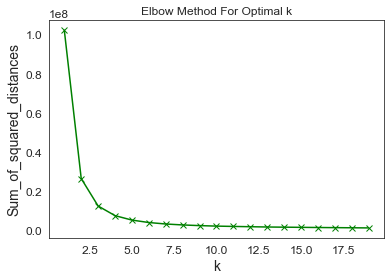

In [40]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [41]:
kmeans = KMeans(n_clusters=4)  #the optimal is at 2 but selected 4 for plotting

kmeans.fit(songs_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [42]:
# PCA

from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)


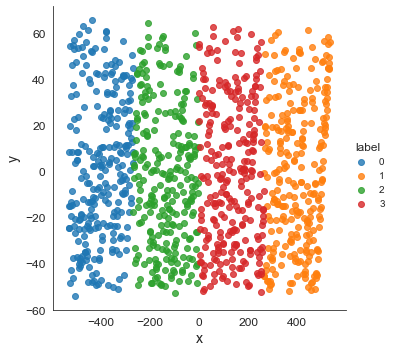

In [43]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)


In [44]:
pca.explained_variance_ratio_

array([0.98835399, 0.00990497])

In [45]:
print (pd.DataFrame(pca.components_,columns=songs_features.columns,index = ['PC-1','PC-2']))


      Unnamed: 0  peak_position  peak_position_grouped  weeks_in_charts  \
PC-1   -0.999943      -0.003118              -0.000645        -0.001675   
PC-2    0.004160      -0.932536              -0.184790         0.267293   

      explicit  spotify_popularity  
PC-1 -0.000063            0.010046  
PC-2 -0.001729            0.157365  


In [46]:
songs['label'] = y_kmeans
songs = songs.sample(frac=1)
songs['label'].value_counts()

1    269
3    267
2    266
0    264
Name: label, dtype: int64

In [47]:
songs[songs['label'] == 0].tail(20)

,Unnamed: 0,artist,track,peak_position,peak_position_grouped,weeks_in_charts,spotify_id,explicit,spotify_popularity,label
830,830,J. Cole,KOD,10,2,12,7yotKA30dwTKNEGomV9ZsI,1.0,72,0
819,819,Future,Wifi Lit,53,11,1,6WlxcZKpEV6Bwe9InoVhMp,1.0,53,0
935,935,The Weeknd,Try Me,26,6,2,4ppTAJUbNXELZcoUaL90wo,0.0,71,0
822,822,Drake,Summer Games,28,6,2,4HG1YiGBseVKzjyKcmAJen,0.0,62,0
866,866,KIDS SEE GHOSTS,Fire,67,14,1,6JyEh4kl9DLwmSAoNDRn5b,1.0,69,0
883,883,Pusha T,The Games We Play,100,20,1,7iEoaTyBCqLaAwJnOP1BTn,1.0,61,0
991,991,Migos,Higher We Go (Intro),83,17,1,43dOwOq0mB4i6j4SpcSkqC,1.0,52,0
876,876,Kendrick Lamar & SZA,All The Stars,7,2,21,3GCdLUSnKSMJhs4Tj6CV3s,1.0,78,0
1003,1003,Troye Sivan,My My My!,80,16,1,4NiehSBQthimPzRsVeOgCT,0.0,73,0
992,992,Migos,Auto Pilot,85,17,1,4Kw3CztmD15X1QGDnnHmLD,1.0,50,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffc3ffa58d0>,
      dtype=object)

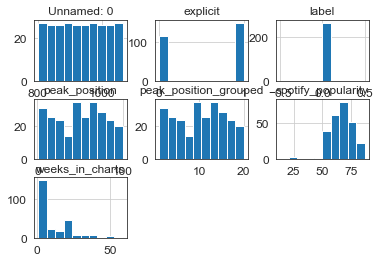

In [48]:
songs[songs['label']==0].hist()

In [49]:
songs[songs['label']==1].head(20)

,Unnamed: 0,artist,track,peak_position,peak_position_grouped,weeks_in_charts,spotify_id,explicit,spotify_popularity,label
51,51,Rod Wave,Girl Of My Dreams,84,17,7,65QRS8iMQ1TsQ93fPZIZ4i,1.0,75,1
43,43,Bad Bunny,Yo Perreo Sola,53,11,16,0SqqAgdovOE24BzxIClpjw,0.0,90,1
78,78,Lady Gaga,Alice,84,17,1,41A89rj3GoMG6ktN37L7PG,0.0,79,1
101,101,Polo G,I Know,95,19,1,40j4RoqmLiivqzRObbQ4BF,1.0,74,1
49,49,Polo G,21,62,13,6,3JKgcAa7r07ocVWcV8bS0H,1.0,84,1
208,208,Jhene Aiko,Triggered,51,11,4,3zPgAKn5tbmCuCKrR3r7qE,1.0,70,1
187,187,Lizzo,Good As Hell,3,1,30,07Oz5StQ7GRoygNLaXs2pd,0.0,80,1
205,205,Lil Uzi Vert,Chrome Heart Tags,45,9,1,46mT9NR7N9Zf5MolcrBgE3,1.0,65,1
220,220,Ashe,Moral Of The Story,71,15,2,2nC3QhMI9reBIOWutbU3Tj,1.0,82,1
32,32,6ix9ine,Gooba,3,1,8,4NhDYoQTYCdWHTvlbGVgwo,1.0,92,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffc3ffa54d0>,
      dtype=object)

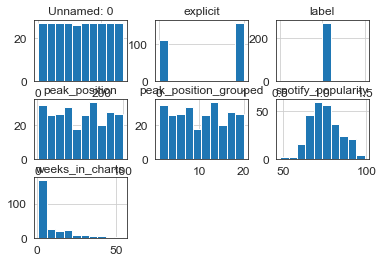

In [50]:
songs[songs['label']==1].hist()

In [51]:
songs[songs['label']==2].head(20)

,Unnamed: 0,artist,track,peak_position,peak_position_grouped,weeks_in_charts,spotify_id,explicit,spotify_popularity,label
764,764,Childish Gambino,Summertime Magic,44,9,5,4j3GWI86JvSaF0BLdmgcfF,0.0,71,2
712,712,Queen Naija,Medicine,45,9,20,4lFfMRH0YH4pW5gczTDbNC,0.0,70,2
787,787,Travis Scott,Stop Trying To Be God,27,6,2,1xYpVRspgaLxdJLOTQkTjg,1.0,73,2
624,624,Imagine Dragons,Natural,13,3,27,2FY7b99s15jUprqC0M5NCT,0.0,81,2
701,701,Eminem,Venom,43,9,5,2SL6oP2YAEQbqsrkOzRGO4,1.0,73,2
586,586,Lady Gaga,Always Remember Us This Way,41,9,9,2rbDhOo9Fh61Bbu23T2qCk,0.0,78,2
666,666,Meek Mill,Almost Slipped,73,15,1,1bx4Jw8A7GQtImIQGccI6D,1.0,51,2
630,630,Future,F&N,83,17,1,5YP6yKgGGsXKukqxXypVAf,1.0,56,2
730,730,Lil Wayne,Hittas,59,12,1,5s6pKnF3ZPtuqvEx1i1V7U,1.0,53,2
591,591,Juice WRLD,Armed And Dangerous,44,9,17,5wujBwqG7INdStqGd4tRMX,1.0,81,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffc410d3790>,
      dtype=object)

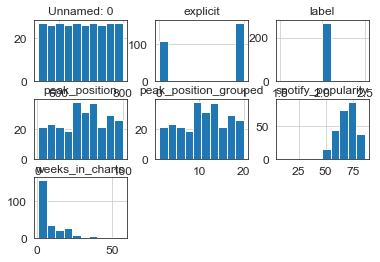

In [52]:
songs[songs['label']==2].hist()

In [53]:
songs[songs['label']==3].head(20)

,Unnamed: 0,artist,track,peak_position,peak_position_grouped,weeks_in_charts,spotify_id,explicit,spotify_popularity,label
283,283,Taylor Swift,Lover,10,2,22,1dGr1c8CrMLDpV6mPbImSI,0.0,80,3
387,387,Shawn Mendes,If I Can't Have You,2,1,23,6LsAAHotRLMOHfCsSfYCsz,0.0,81,3
514,514,Future,XanaX Damage,98,20,1,3tZ4zv4UuenjJGSNUMfBNG,1.0,53,3
430,430,A$AP Rocky,Babushka Boi,69,14,1,643PW82aBMUa1FiWi5VQY7,1.0,73,3
361,361,Brantley Gilbert + Lindsay Ell,What Happens In A Small Town,53,11,14,44UTzjhEM825Sw0qC89oGK,0.0,55,3
415,415,Dan + Shay,All To Myself,31,7,20,08tq1XcHwVt5PHXUo87i0D,0.0,72,3
297,297,Doja Cat,Candy,86,18,6,1VJwtWR6z7SpZRwipI12be,1.0,77,3
358,358,Miranda Lambert,It All Comes Out In The Wash,70,14,2,41FLEFSeRCv19OBn0vLiaH,0.0,61,3
367,367,Cole Swindell,Love You Too Late,49,10,14,52MNypbTWiwybwzhXvsPk5,0.0,65,3
289,289,Niall Horan,Nice To Meet Ya,63,13,14,3cphb8kdsjElYR7r5icK3H,0.0,77,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffc4001ced0>,
      dtype=object)

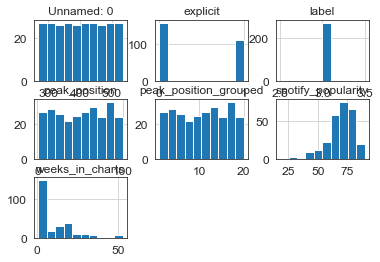

In [54]:
songs[songs['label']==3].hist()

In [55]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

X = songs_features
y = y_kmeans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:

y_pred = rfc.predict(X_test)    

In [57]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


In [58]:
# GENRE definntions

definitions = ['Genre 1','Genre 2','Genre 3','Genre 4']

In [59]:
features = songs_features.columns
list(zip(songs_features[features], rfc.feature_importances_))

[('Unnamed: 0', 0.804449223695724),
 ('peak_position', 0.04492588618734351),
 ('peak_position_grouped', 0.024917423166609713),
 ('weeks_in_charts', 0.04085671401519326),
 ('explicit', 0.012545465152613388),
 ('spotify_popularity', 0.07230528778251608)]

In [60]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [61]:
knn_pred =knn.predict(X_test)

Confusion matrix, without normalization
[[85  0  0  0]
 [ 0 94  0  1]
 [ 0  0 87  2]
 [ 0  1  0 82]]


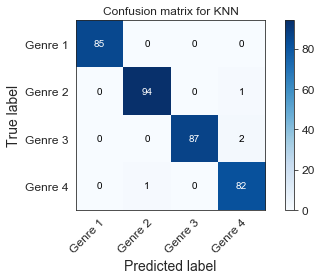

In [62]:
plot_confusion_matrix(y_test, knn_pred, classes=definitions,
                      title='Confusion matrix for KNN')

In [63]:
print(classification_report(y_test,knn_pred,target_names=definitions)+'KNN')

              precision    recall  f1-score   support

     Genre 1       1.00      1.00      1.00        85
     Genre 2       0.99      0.99      0.99        95
     Genre 3       1.00      0.98      0.99        89
     Genre 4       0.96      0.99      0.98        83

    accuracy                           0.99       352
   macro avg       0.99      0.99      0.99       352
weighted avg       0.99      0.99      0.99       352
KNN
